In [19]:
# importing libraries  
import numpy as nm  
import matplotlib.pyplot as mtp 
import matplotlib.pyplot as plt 
import pandas as pd  
  
#importing datasets  
data_set= pd.read_csv('chair.csv')  

In [4]:
data_set.head(9)

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Andhra Pradesh,Kurnool,Kurnool,chair,Local,03/01/2020,1350,4390,3100
1,Andhra Pradesh,Kurnool,Kurnool,chair,Local,04/01/2020,1390,4400,3200
2,Andhra Pradesh,Kurnool,Kurnool,chair,Local,06/01/2020,1460,5150,4310
3,Andhra Pradesh,Kurnool,Kurnool,chair,Local,07/01/2020,2010,5200,4200
4,Andhra Pradesh,Kurnool,Kurnool,chair,Local,10/01/2020,1320,4050,3300
5,Andhra Pradesh,Kurnool,Kurnool,chair,Local,11/01/2020,1060,3670,2870
6,Andhra Pradesh,Kurnool,Kurnool,chair,Local,13/01/2020,1200,3950,2850
7,Andhra Pradesh,Kurnool,Kurnool,chair,Local,17/01/2020,1290,4600,3580
8,Andhra Pradesh,Kurnool,Kurnool,chair,Local,18/01/2020,1770,4510,3330


In [5]:
#Extracting Independent and dependent Variable  
x= data_set.iloc[:, [6,7]].values  
y= data_set.iloc[:, 1].values  

In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
temp= y
le = preprocessing.LabelEncoder()
le.fit(temp)
Actual_District=list(le.classes_)
x_temp=le.transform(temp)
inverse = list(le.inverse_transform(x_temp))
newarr = x_temp.reshape(len(data_set),1) #Changing row level to column level
xx = nm.append(x, newarr, axis=1)

In [38]:
#Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, x_temp, test_size= 0.25, random_state=0)  
  
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  
all_accuracy=[]
K_value = []
for i in range(3,45,2):
    #Fitting K-NN classifier to the training set  
    from sklearn.neighbors import KNeighborsClassifier  
    classifier= KNeighborsClassifier(n_neighbors=i, metric='minkowski', p=2 )  
    classifier.fit(x_train, y_train)  

    #Predicting the test set result  
    y_pred= classifier.predict(x_test) 

    from sklearn.metrics import confusion_matrix  
    cm= confusion_matrix(y_test, y_pred)  
    def accuracy(confusion_matrix):
        diagonal_sum = confusion_matrix.trace()
        sum_of_all_elements = confusion_matrix.sum()
        return diagonal_sum / sum_of_all_elements 
    accuracy = accuracy(cm)
    accuracy
    K_value.append(i)
    all_accuracy.append(accuracy)


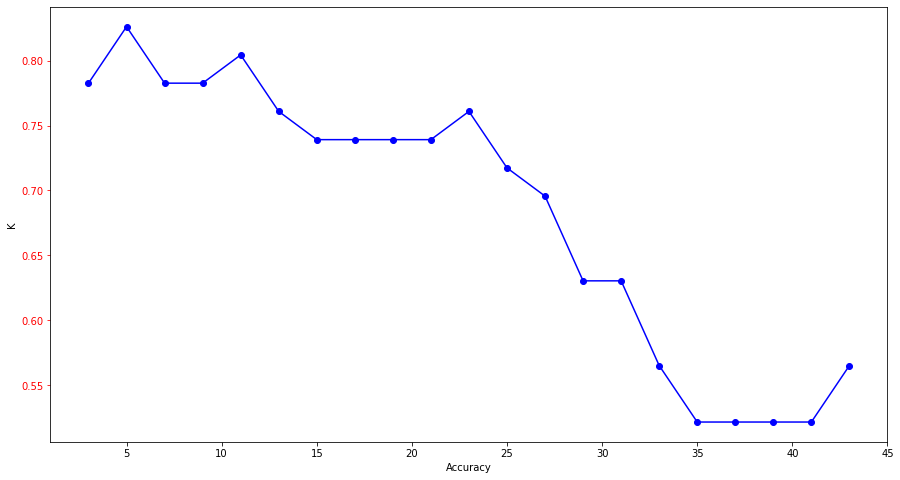

In [43]:
fig, ax = plt.subplots()
ax.plot(K_value,all_accuracy,color='blue',marker='o')
ax.set_xlabel('Accuracy')
ax.set_ylabel('K', color='black')
ax.tick_params('y', colors='red')

plt.rcParams['figure.figsize'] = [15, 8]
plt.show()

In [16]:
len(x)

182

In [127]:
import math
minprice=670
maxprice=1820
length=[]
for i in range (0,len(x)):
    temp=[]
    distance = math.sqrt(((x[i][0]-minprice)**2)+((x[i][1]-maxprice)**2))
    temp.append(distance)
    tempnum=x_temp[i]
    temp.append(tempnum)
    length.append(temp)
length.sort()
k=3 #As we calculated that we get better result with k = 3
answer = []
for i in range(0,k):
    answer.append(length[i][1])
 
from sortedcontainers import SortedDict
sd = SortedDict()
for i in x_temp:
    sd[i] = 0
for i in answer:
    sd[i] = sd[i]+1 
Max_value = -584584
for i in sd:
    Max_value = max(Max_value,sd[i])
    
Actual_District[Max_value]    

'Nawanshahr'

'Nawanshahr'

In [9]:
len(data_set)

20